# Регрессия (часть 2)

## Цели работы

1. **Импорт библиотек и загрузка датасета:**
   - Импортировать необходимые библиотеки и загрузить датасет для анализа и построения модели регрессии.
   - Провести предварительную обработку и визуализацию данных для лучшего понимания их структуры и распределения.

2. **Реализация и оптимизация градиентного спуска:**
   - Реализовать функцию градиентного спуска для минимизации ошибки предсказания модели.
   - Добавить регуляризацию в функцию градиентного спуска для контроля сложности модели и предотвращения переобучения.
   - Оптимизировать процесс обучения с помощью подбора гиперпараметров, таких как скорость обучения (learning rate) и коэффициент регуляризации.

3. **Визуализация результатов моделирования:**
   - Визуализировать исходные данные и построенную модель на одном графике для наглядного представления качества подгонки модели к данным.
   - Использовать графические средства для демонстрации результата работы градиентного спуска и качества подбора модели.

Цели данного документа направлены на глубокое понимание и практическую реализацию градиентного спуска в контексте регрессионного анализа, а также на изучение влияния регуляризации на качество модели и её способность обобщать данные.


## Этап 1. Импорт библиотек и загрузка датасета

In [ ]:
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


## Этап 2. Градиентный спуск

 В реализацию функции `gradient` добавлен параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [2]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha) -> np.array:
    n = X.shape[0]
    y_hat = X.dot(w.T)
    error = y - y_hat
    grad = ((np.multiply(X, error)) + 2 * alpha * w).sum(axis=0) * (-1.0) * 2.0 / n
    return grad, error

In [3]:
def eval_w_next(X, y, eta, w_current: np.array):
    alpha = 0.001
    grad, error = gradient(X, y, w_current, alpha)
    w_next = w_current - eta * grad
    weight_evolution = distance.euclidean(w_current.reshape(-1), w_next.reshape(-1))
    return w_next, weight_evolution, grad

In [4]:
def gradient_descent(X, y, eta=0.01, epsilon=0.001):
    m = X.shape[1]
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w - w_next| = %.5f, grad=%s" % (step, weight_evolution, grad))
    return w

In [5]:
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X])

w = gradient_descent(X, data['y_train'].values.reshape(-1,1), eta=0.008)

step 100 |w - w_next| = 0.00396, grad=[-0.47570373  0.13742138]
step 200 |w - w_next| = 0.00327, grad=[-0.39272602  0.11345074]
step 300 |w - w_next| = 0.00270, grad=[-0.32422223  0.09366135]
step 400 |w - w_next| = 0.00223, grad=[-0.26766766  0.07732386]
step 500 |w - w_next| = 0.00184, grad=[-0.22097799  0.06383614]
step 600 |w - w_next| = 0.00152, grad=[-0.18243246  0.05270111]
step 700 |w - w_next| = 0.00125, grad=[-0.1506105   0.04350838]
step 800 |w - w_next| = 0.00104, grad=[-0.12433928  0.03591914]


In [6]:
support = np.linspace(X.min(), X.max(), num=100)
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

## Этап 3. Визуализация результатов моделирования

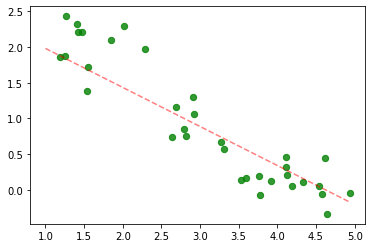

In [7]:
plt.plot(support, y_hat, 'r--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

На графике представлена визуализация результатов моделирования полиномиальной регрессии. Зелёные точки обозначают наблюдаемые данные (`x_train` и `y_train`), и мы видим, что они расположены в основном вдоль определённого тренда. Красная пунктирная линия представляет собой предсказанное многообразие, полученное с помощью обученной модели регрессии.

Из графика видно, что предсказанное многообразие не совсем точно описывает все данные, что может указывать на необходимость дальнейшей оптимизации модели, например, через подбор более сложной модели или настройку гиперпараметров. Также стоит рассмотреть возможность поиска дополнительных признаков или проведения более глубокого разведочного анализа для лучшего понимания взаимосвязей в данных.
